In [2]:
%load_ext Cython

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def initialize(size):
    x, y = np.meshgrid(np.linspace(-2, 1, size),
                       np.linspace(-1.5, 1.5, size))
    c = x + 1j*y
    z = c.copy()
    m = np.zeros((size, size))
    return c, z, m
size = 200
iterations = 100
        
def mandelbrot_numpy(c, z, m, iterations):
    for n in range(iterations):
        indices = np.abs(z) <= 10
        z[indices] = z[indices]**2 + c[indices]
        m[indices] = n

In [4]:
%%timeit -n1 -r10 c, z, m = initialize(size)
mandelbrot_numpy(c, z, m, iterations)

1 loops, best of 10: 67.7 ms per loop


In [11]:
%%cython
import numpy as np
def mandelbrot_cython(m,size, iterations):
    for i in range(size):
            for j in range(size):
                c = -2 + 3./size*j + 1j*(1.5-3./size*i)
                z = 0
                for n in range(iterations):
                    if np.abs(z) <= 10:
                        z = z*z + c
                        m[i, j] = n
                    else:
                        break    

In [20]:
%%cython -a
import numpy as np
def fast_mandelbrot_cython(int[:,::1] m,
                      int size,
                      int iterations):
    cdef int i, j, n
    cdef complex z, c
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if z.real**2 + z.imag**2 <= 100:
                   z = z*z + c
                   m[i, j] = n
                else:
                    break

In [16]:
%%timeit
size = 200
iterations = 100
m = np.zeros((size, size))
mandelbrot_cython(m, size, iterations)

1 loops, best of 3: 1.29 s per loop


In [19]:
%%timeit -n1 -r1 m = np.zeros((size, size),dtype=np.int32)
fast_mandelbrot_cython(m, size, iterations)

1 loops, best of 1: 6.37 ms per loop


([], <a list of 0 Text yticklabel objects>)

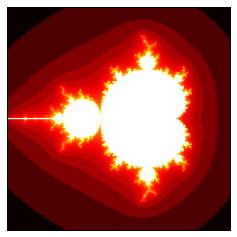

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.log(m), cmap=plt.cm.hot)
plt.xticks([]); plt.yticks([])

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

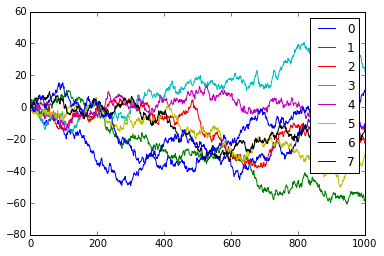

In [22]:
np.random.seed(12)
for i in range(8):
    x = np.arange(1000)
    y = np.random.randn(1000).cumsum()
    plt.plot(x, y, label=str(i))
    plt.legend()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
x1 = np.random.randn(80)
x2 = np.random.randn(80)
x3 = x1 * x2
y1 = .5 + 2 * x1 - x2 + 2.5 * x3 + \
      3 * np.random.randn(80)
y2 = .5 + 2 * x1 - x2 + 2.5 * np.random.randn(80)
y3 = y2 + np.random.randn(80)

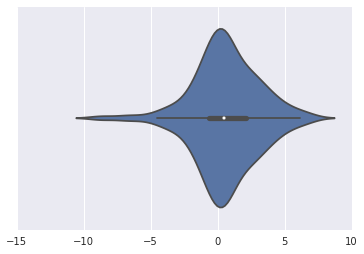

In [29]:
sns.violinplot([x1,y2, y3])

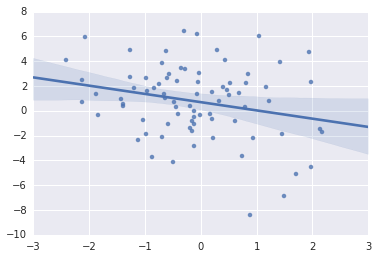

In [27]:
sns.regplot(x2, y2)

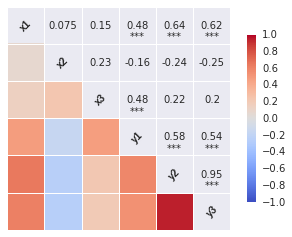

In [34]:
import pandas as pd
df = pd.DataFrame(dict(x1=x1, x2=x2, x3=x3, 
                        y1=y1, y2=y2, y3=y3))
sns.corrplot(df)